In [1]:
#1
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

file_path = 'data.csv'
data = pd.read_csv(file_path, header=None, names=['Values'])

print("Original Data:")
print(data)

mean_values = np.mean(data['Values'])
data['Mean_Removed_Values'] = data['Values'] - mean_values

normalized_values = (data['Values'] - np.min(data['Values'])) / (np.max(data['Values']) - np.min(data['Values']))
data['Normalized_Values'] = normalized_values

scaler = ((data['Values'] - max(data['Values']))/max(data['Values']))

print("\nMean Removed Data:")
print(data[['Mean_Removed_Values']])

print("\nNormalized Data:")
print(data[['Normalized_Values']])

print("\nStandardized Data:")
print(scaler)


Original Data:
    Values
0       70
1       67
2       57
3       64
4       74
5       65
6       56
7       59
8       60
9       63
10      59
11      53
12      44
13      61
14      57
15      71
16      46
17      53
18      64
19      40
20      67

Mean Removed Data:
    Mean_Removed_Values
0              10.47619
1               7.47619
2              -2.52381
3               4.47619
4              14.47619
5               5.47619
6              -3.52381
7              -0.52381
8               0.47619
9               3.47619
10             -0.52381
11             -6.52381
12            -15.52381
13              1.47619
14             -2.52381
15             11.47619
16            -13.52381
17             -6.52381
18              4.47619
19            -19.52381
20              7.47619

Normalized Data:
    Normalized_Values
0            0.882353
1            0.794118
2            0.500000
3            0.705882
4            1.000000
5            0.735294
6            0.470588
7

In [2]:
#2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR  # For regression instead of SVC for classification
from sklearn.linear_model import LinearRegression  # For regression
from sklearn.tree import DecisionTreeRegressor  # For regression
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn import datasets
from sklearn.metrics import mean_absolute_error

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naïve Bayes Regressor
nb_regressor = GaussianNB()
nb_regressor.fit(X_train, y_train)
nb_predictions = nb_regressor.predict(X_test)
nb_mae = mean_absolute_error(y_test, nb_predictions)
print(f"Naïve Bayes Regressor MAE: {nb_mae}")

# Support Vector Machine (SVM) Regressor
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm_mae = mean_absolute_error(y_test, svm_predictions)
print(f"SVM Regressor MAE: {svm_mae}")

# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_predictions = lr_regressor.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression MAE: {lr_mae}")

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"Decision Tree Regressor MAE: {dt_mae}")

# Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest Regressor MAE: {rf_mae}")

Naïve Bayes Regressor MAE: 57.247191011235955
SVM Regressor MAE: 56.02372412801096
Linear Regression MAE: 42.79409467959994
Decision Tree Regressor MAE: 54.03370786516854
Random Forest Regressor MAE: 44.24022471910112


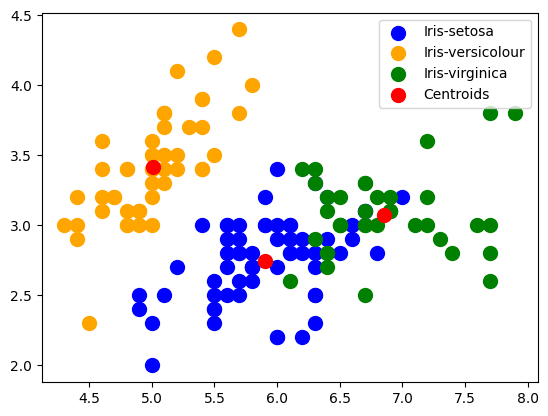

In [3]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

iris = pd.read_csv("Iris.csv")
x = iris.iloc[:, [1, 2, 3, 4]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='blue', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()


In [4]:
#4
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources if not already installed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample text
text = "The quick brown foxes are jumping over the lazy dogs. The dogs are not amused."

# Tokenization
tokens = word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Stemming
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Display the results
print("Original Text:", text)
print("\nTokenization:", tokens)
print("\nFiltered Tokens (without stop words):", filtered_tokens)
print("\nStemmed Tokens:", stemmed_tokens)
print("\nLemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text: The quick brown foxes are jumping over the lazy dogs. The dogs are not amused.

Tokenization: ['The', 'quick', 'brown', 'foxes', 'are', 'jumping', 'over', 'the', 'lazy', 'dogs', '.', 'The', 'dogs', 'are', 'not', 'amused', '.']

Filtered Tokens (without stop words): ['quick', 'brown', 'foxes', 'jumping', 'lazy', 'dogs', '.', 'dogs', 'amused', '.']

Stemmed Tokens: ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog', '.', 'dog', 'amus', '.']

Lemmatized Tokens: ['quick', 'brown', 'fox', 'jumping', 'lazy', 'dog', '.', 'dog', 'amused', '.']


In [5]:
#5
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word.lower() for word in word_tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_words

def create_bow_model(texts):
    all_words = []
    for text in texts:
        words = preprocess_text(text)
        all_words.extend(words)

    word_freq = FreqDist(all_words)
    bow_model = {word: freq for word, freq in word_freq.items()}
    return bow_model

# Example usage
texts = [
    "The cat sat on the mat, and the mat was comfortable.",
    "She sang a sweet song, a song that touched everyone's heart.",
    "Coding coding can be challenging, but coding is also incredibly rewarding.",
]

bow_model = create_bow_model(texts)

# Print the Bag of Words model
print("Bag of Words Model:")
for word, freq in bow_model.items():
    print(f"{word}: {freq}")


Bag of Words Model:
cat: 1
sat: 1
mat: 2
comfortable: 1
sang: 1
sweet: 1
song: 2
touched: 1
everyone: 1
heart: 1
coding: 3
challenging: 1
also: 1
incredibly: 1
rewarding: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#6
import csv
import re

def identify_patterns(csv_file_path, column_name):
    patterns = {}

    with open(csv_file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)

        for row in reader:
            text = row[column_name]

            # Example pattern: finding words that start with 'pattern'
            pattern_matches = re.findall(r'Female', text, flags=re.IGNORECASE)

            # Update patterns dictionary with matches
            for match in pattern_matches:
                if match in patterns:
                    patterns[match] += 1
                else:
                    patterns[match] = 1

    return patterns
csv_file_path = 'Social.csv'  # Update with your CSV file path
column_name = 'Gender'     # Update with the actual column name in your CSV file

result = identify_patterns(csv_file_path, column_name)

# Display the identified patterns and their counts
for pattern, count in result.items():
    print(f"Pattern: {pattern}, Count: {count}")

Pattern: Female, Count: 204


In [7]:
!pip install hmmlearn
import numpy as np
from hmmlearn import hmm

# Step 1: Define Model Parameters
n_states = 2  # Number of hidden states (Rainy and Sunny)

# Corrected Transition matrix (A): Probability of transitioning from one state to another
trans_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])

# Emission matrix (B): Probability of observing an emission given the current state
emission_matrix = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])

# Initial state probabilities (π): Probability distribution of starting in each state
initial_probs = np.array([0.6, 0.4])

# Step 2: Create HMM Model
model = hmm.MultinomialHMM(n_components=n_states,
                           startprob_prior=initial_probs,
                           transmat_prior=trans_matrix,
                           n_iter=100)

# Step 3: Generate Training Data (for simplicity, you can use a pre-existing dataset)
# Observations: 0 - Umbrella, 1 - Jacket, 2 - T-shirt
train_data = np.array([[0, 1, 2, 0, 1, 2, 0, 2, 1]])

# Reshape the array if needed
train_data = train_data.reshape(-1, 1)

# Step 4: Fit the Model
model.fit(train_data)

# Step 5: Predict States for a New Sequence
new_data = np.array([[0, 2, 1]])  # Umbrella, T-shirt, Jacket
new_data = new_data.reshape(-1, 1)
predicted_states = model.predict(new_data)

# Map numerical predictions to weather states
weather_states = ['Rainy', 'Sunny']
predicted_states_text = [weather_states[state] for state in predicted_states]

# Display Results
print("Predicted Weather States:", predicted_states_text)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Predicted Weather States: ['Sunny', 'Rainy', 'Sunny']


In [8]:
#9
def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board, player):
    # Check rows, columns, and diagonals
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_board_full(board):
    return all(board[i][j] != " " for i in range(3) for j in range(3))

def tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]
    players = ["X", "O"]
    current_player = players[0]

    while True:
        print_board(board)

        # Get player move
        while True:
            row = int(input("Enter row (0, 1, or 2): "))
            col = int(input("Enter column (0, 1, or 2): "))
            if 0 <= row < 3 and 0 <= col < 3 and board[row][col] == " ":
                break
            else:
                print("Invalid move. Try again.")

        # Make the move
        board[row][col] = current_player

        # Check for a winner
        if check_winner(board, current_player):
            print_board(board)
            print(f"Player {current_player} wins!")
            break

        # Check for a tie
        if is_board_full(board):
            print_board(board)
            print("It's a tie!")
            break

        # Switch to the other player
        current_player = players[1] if current_player == players[0] else players[0]

if __name__ == "__main__":
    tic_tac_toe()

  |   |  
-----
  |   |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 1
  |   |  
-----
  | X |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 0
Enter column (0, 1, or 2): 1
  | O |  
-----
  | X |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 0
  | O |  
-----
X | X |  
-----
  |   |  
-----
Enter row (0, 1, or 2): 2
Enter column (0, 1, or 2): 2
  | O |  
-----
X | X |  
-----
  |   | O
-----
Enter row (0, 1, or 2): 1
Enter column (0, 1, or 2): 2
  | O |  
-----
X | X | X
-----
  |   | O
-----
Player X wins!


In [9]:
#10
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and compile a single-layer neural network
model_single_layer = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

model_single_layer.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the single-layer neural network
model_single_layer.fit(X_train, y_train, epochs=22, validation_data=(X_test, y_test))

# Evaluate the single-layer model
y_pred_single_layer = np.argmax(model_single_layer.predict(X_test), axis=1)
single_layer_accuracy = accuracy_score(y_test, y_pred_single_layer)
print(f"\nSingle-layer Neural Network - Accuracy: {single_layer_accuracy}")

# Define and compile a multi-layer neural network
model_multi_layer = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_multi_layer.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Train the multi-layer neural network
model_multi_layer.fit(X_train, y_train, epochs=22, validation_data=(X_test, y_test))

# Evaluate the multi-layer model
y_pred_multi_layer = np.argmax(model_multi_layer.predict(X_test), axis=1)
multi_layer_accuracy = accuracy_score(y_test, y_pred_multi_layer)
print(f"\nMulti-layer Neural Network - Accuracy: {multi_layer_accuracy}")

Epoch 1/22
4/4 [==============================] - 1s 84ms/step - loss: 1.0485 - accuracy: 0.4833 - val_loss: 1.0281 - val_accuracy: 0.4667
Epoch 2/22
4/4 [==============================] - 0s 19ms/step - loss: 0.9874 - accuracy: 0.5333 - val_loss: 0.9650 - val_accuracy: 0.6000
Epoch 3/22
4/4 [==============================] - 0s 12ms/step - loss: 0.9313 - accuracy: 0.5917 - val_loss: 0.9061 - val_accuracy: 0.7000
Epoch 4/22
4/4 [==============================] - 0s 19ms/step - loss: 0.8820 - accuracy: 0.7250 - val_loss: 0.8513 - val_accuracy: 0.8667
Epoch 5/22
4/4 [==============================] - 0s 13ms/step - loss: 0.8340 - accuracy: 0.7583 - val_loss: 0.8008 - val_accuracy: 0.8667
Epoch 6/22
4/4 [==============================] - 0s 13ms/step - loss: 0.7910 - accuracy: 0.7833 - val_loss: 0.7543 - val_accuracy: 0.8667
Epoch 7/22
4/4 [==============================] - 0s 18ms/step - loss: 0.7522 - accuracy: 0.8083 - val_loss: 0.7118 - val_accuracy: 0.8667
Epoch 8/22
4/4 [===========

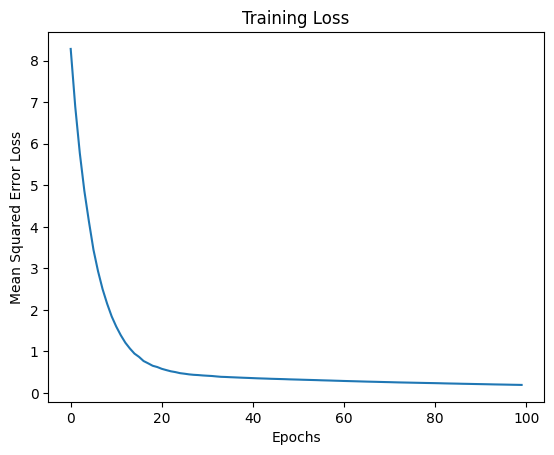

1/1 [==============================] - 0s 95ms/step
Input: 0.2, Predicted Output: 1.8530526161193848
Input: 0.5, Predicted Output: 2.007234811782837
Input: 0.8, Predicted Output: 2.161417007446289


In [10]:
#11
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(0)
X_train = np.random.rand(100, 1)
y_train = 2 * X_train + 1 + 0.1 * np.random.randn(100, 1)

# Build the model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(units=1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss')
plt.show()

# Make predictions on new data
X_test = np.array([[0.2], [0.5], [0.8]])
predictions = model.predict(X_test)

# Print the predictions
for i in range(len(X_test)):
    print(f"Input: {X_test[i][0]}, Predicted Output: {predictions[i][0]}")

In [11]:
#12
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/5
1688/1688 [==============================] - 71s 41ms/step - loss: 0.1536 - accuracy: 0.9532 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 2/5
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0423 - val_accuracy: 0.9887
Epoch 3/5
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0477 - val_accuracy: 0.9880
Epoch 4/5
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0332 - val_accuracy: 0.9920
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0315 - accuracy: 0.9898

Test accuracy: 0.989799976348877
